In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from preprocess import process_cad_rads_labels, evaluate_performance, plot_confusion_matrix, compare_certainty

In [2]:
# VERSION = 'v1.1'
# data = pd.read_csv(f'sample_processed_internal_test_50_{VERSION}.csv')


VERSION = 'v2.0'
data = pd.read_csv(f'241201/new_internal_test.csv')

data.fillna(value='None', inplace=True)

In [3]:
labels = data[['CAD-RADS','Plaque Burden', 'E', 'I', 'N', 'G', 'HRP', 'S', 'CAC_available']]


# pred = pd.read_excel('CCTA_internal.xlsx')
# pred = pd.read_excel('CCTA_internal_10epoch.xlsx')
# pred = pd.read_excel('CCTA_internal_8b_10epoch_originalprompt.xlsx')
# pred = pd.read_excel('CCTA_internal_8b_20epoch_valset16.xlsx')
# pred = pd.read_excel('CCTA_internal_8b_5epoch_originalprompt.xlsx')
# pred = pd.read_excel('CCTA_internal_8b_NSHOT3_originalprompt.xlsx')
# pred = pd.read_excel('CCTA_internal_8b_NSHOT3_originalprompt_again.xlsx')
# pred = pd.read_excel('CCTA_internal_70b_NSHOT3_originalprompt.xlsx')
# pred = pd.read_excel('CCTA_internal_70b_NSHOT3_originalprompt_again.xlsx')

# pred = pd.read_excel('241201/CCTA_internal_8b_NSHOT3.xlsx')
pred = pd.read_excel('241201/CCTA_internal_70b_NSHOT3.xlsx')
# pred = pd.read_excel('241201/CCTA_internal_8b_10epoch.xlsx')
pred = pred.iloc[:,3:]


pred.columns = pred.columns.str.replace('Plaque_Burden', 'Plaque Burden')

pred = pred[labels.iloc[:,:-1].columns]

In [4]:
not_in_format = pred['CAD-RADS']!='z'
pred = pred[not_in_format]
labels = labels[not_in_format]
print(sum(~not_in_format))

0


In [10]:
pred.loc[pred['CAD-RADS']=='N', 'CAD-RADS']='0'

In [5]:
set(pred['CAD-RADS'])

{'0', '1', '2', '3', '4A', '4B', '5'}

In [6]:
pred[['E', 'N', 'S', 'I', 'G', 'HRP']] = pred[['E', 'N', 'S', 'I', 'G', 'HRP']].astype('int64')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to ha

CAD-RADS Metrics:
Accuracy: 72.0%
F1 Score: 0.7229


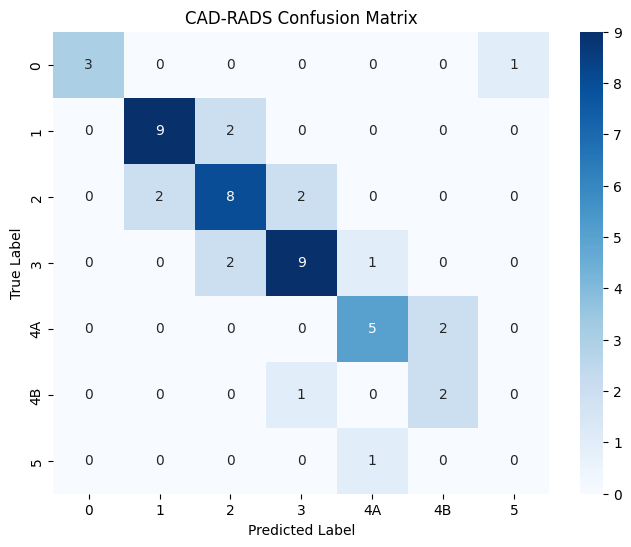

Plaque Burden Metrics:
Accuracy: 85.71%
F1 Score: 0.8605


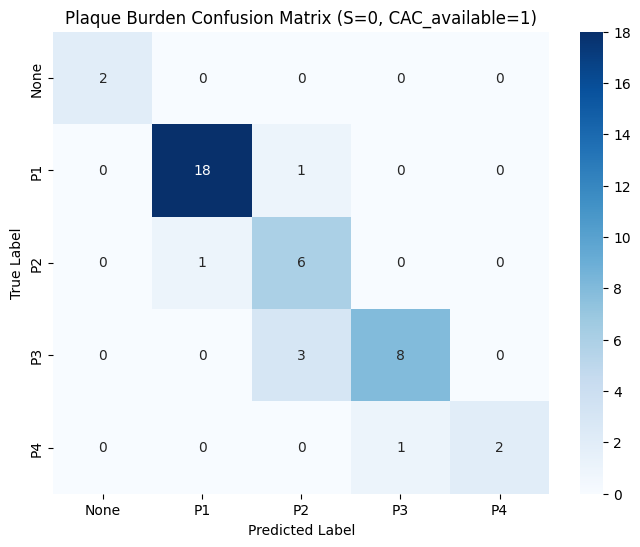

E Metrics:
Accuracy: 100.0%
F1 Score: 1.0


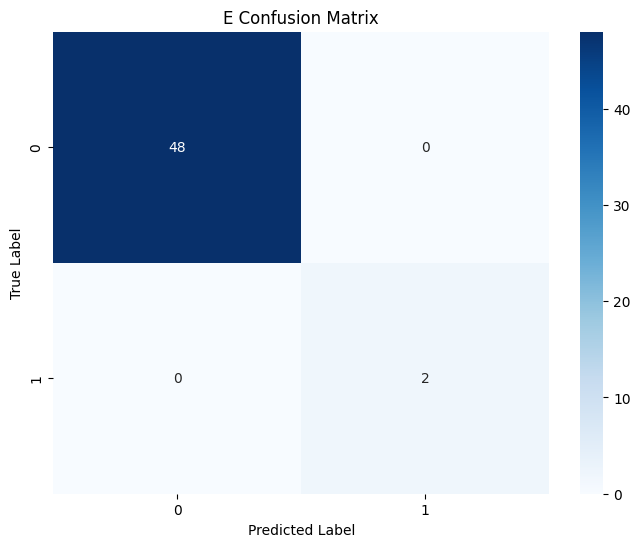

I Metrics:
Accuracy: 100.0%
F1 Score: 1.0


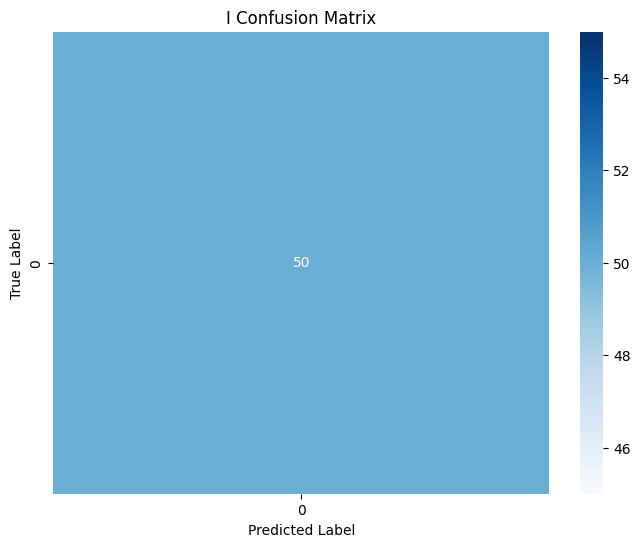

N Metrics:
Accuracy: 100.0%
F1 Score: 1.0


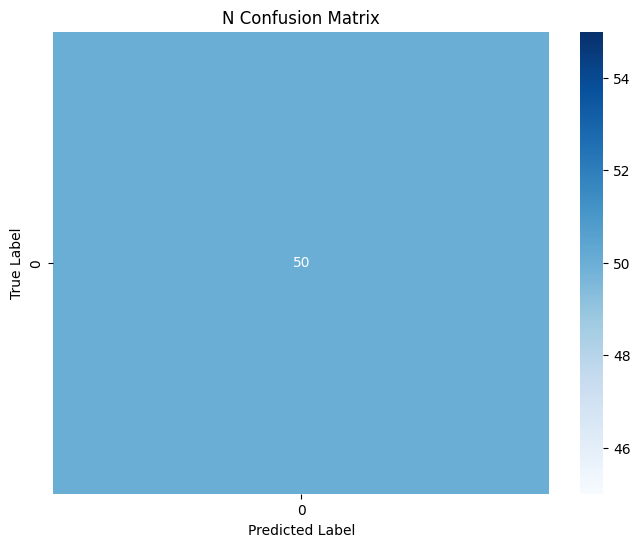

G Metrics:
Accuracy: 100.0%
F1 Score: 1.0


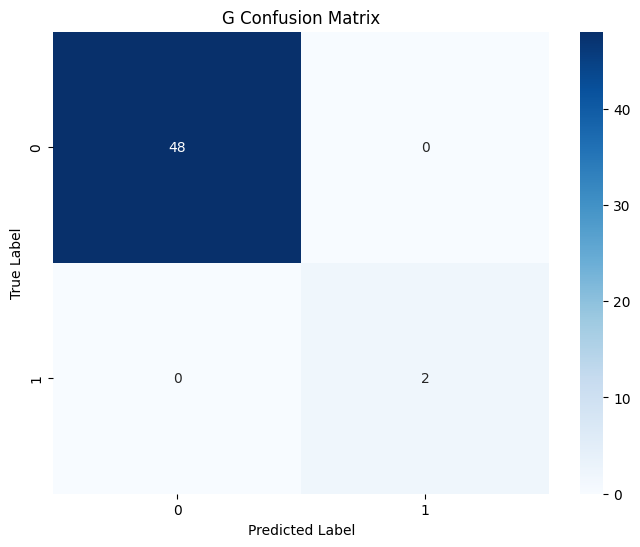

HRP Metrics:
Accuracy: 100.0%
F1 Score: 1.0


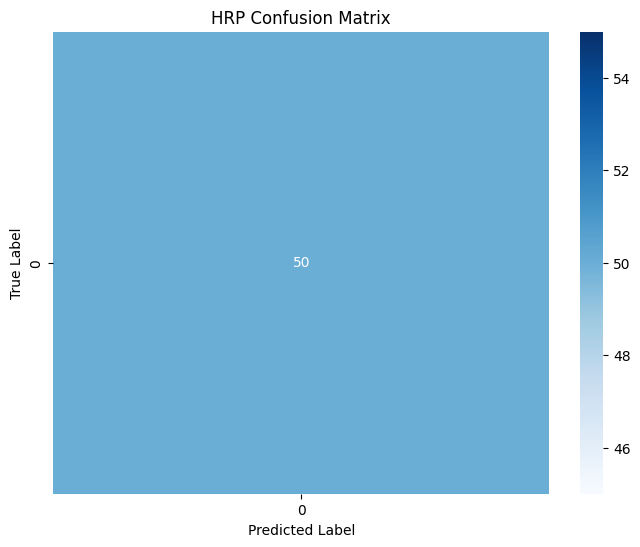

S Metrics:
Accuracy: 98.0%
F1 Score: 0.979


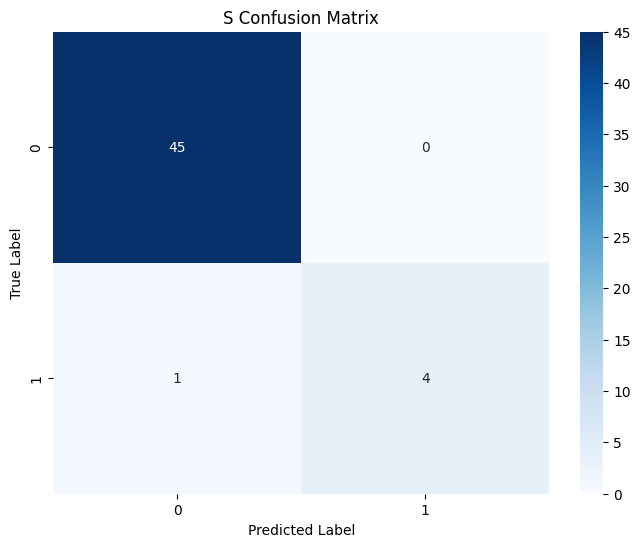

In [7]:
# 성능 평가 및 플롯 실행
performance_metrics = evaluate_performance(labels, pred)
for key, value in performance_metrics.items():
    print(f"{key} Metrics:")
    print(f"Accuracy: {round(value['Accuracy']*100,2)}%")
    print(f"F1 Score: {round(value['F1 Score'], 4)}")
    # print(f"Confusion Matrix:\n{value['Confusion Matrix']}\n")
    # 혼동 행렬 플롯
    if key in ['CAD-RADS', 'HRP', 'E', 'G', 'N', 'I', 'S']:
        class_labels = np.unique(np.concatenate((pred[key].dropna(), labels[key].dropna())))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix')
    elif key == 'Plaque Burden':
        # S가 0이고 CAC_available이 1인 경우만 선택
        mask = (labels['S'] == 0) & (labels['CAC_available'] == 1)
        plaque_data = pred[key][mask].dropna()
        plaque_labels = labels[key][mask].dropna()
        class_labels = np.unique(np.concatenate((plaque_data, plaque_labels)))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix (S=0, CAC_available=1)')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


CAD-RADS Metrics:
Accuracy: 87.76%
F1 Score: 0.8581


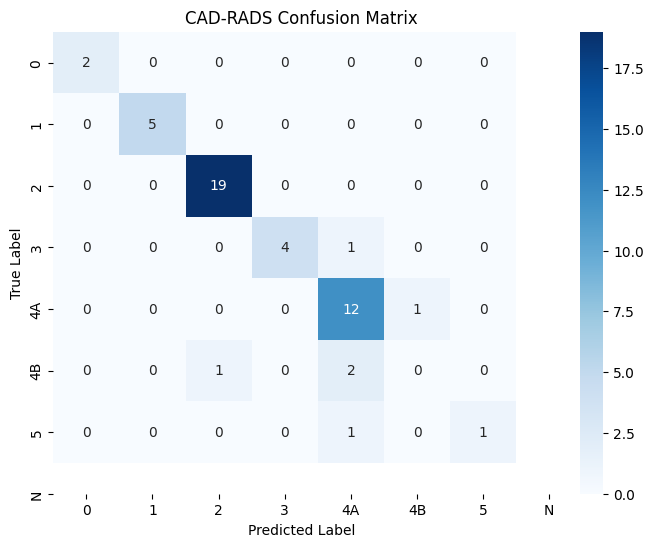

Plaque Burden Metrics:
Accuracy: 93.02%
F1 Score: 0.9302


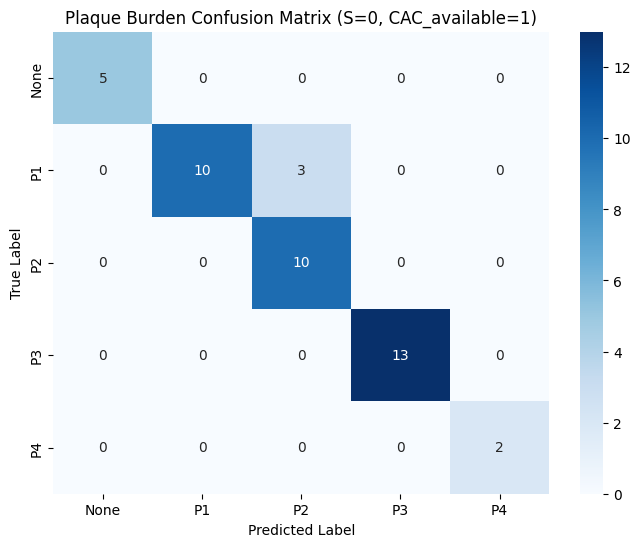

E Metrics:
Accuracy: 98.0%
F1 Score: 0.9701


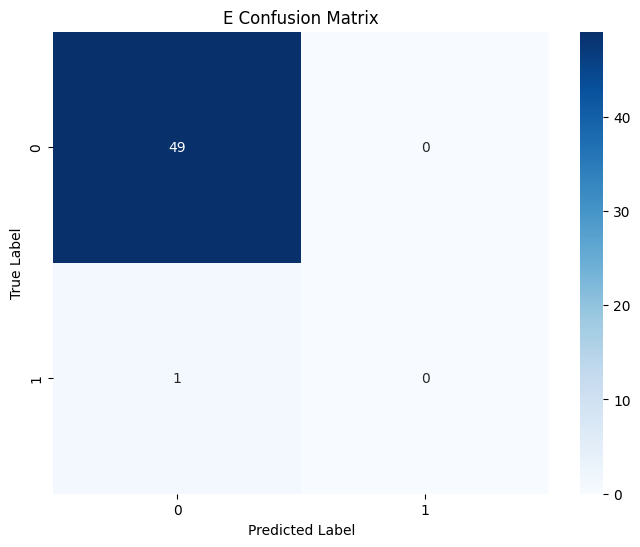

N Metrics:
Accuracy: 100.0%
F1 Score: 1.0


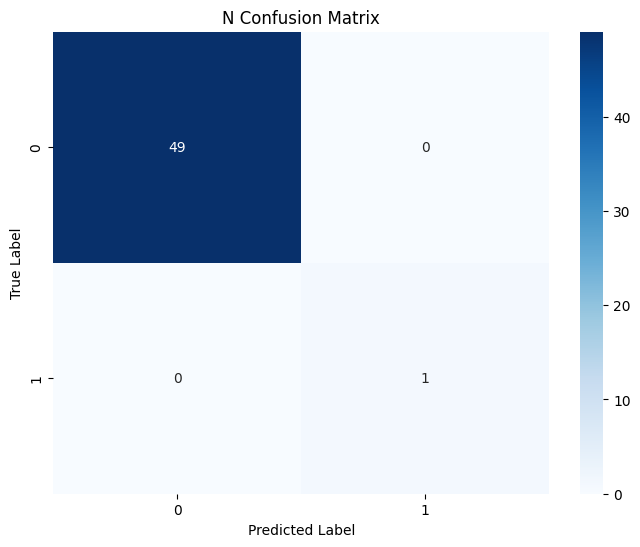

S Metrics:
Accuracy: 100.0%
F1 Score: 1.0


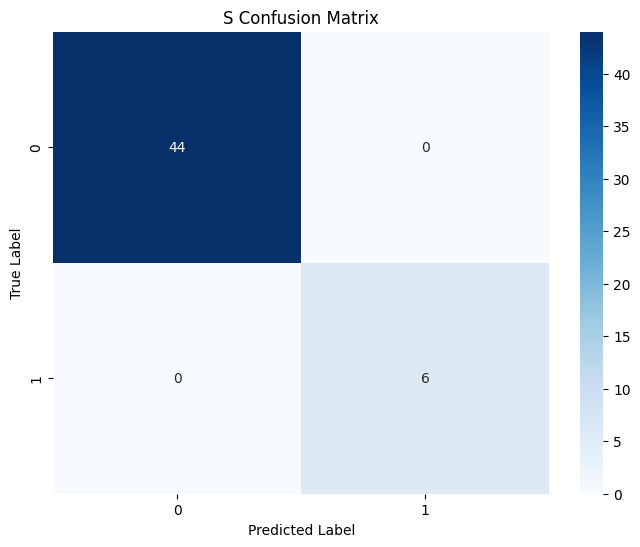

I Metrics:
Accuracy: 100.0%
F1 Score: 1.0


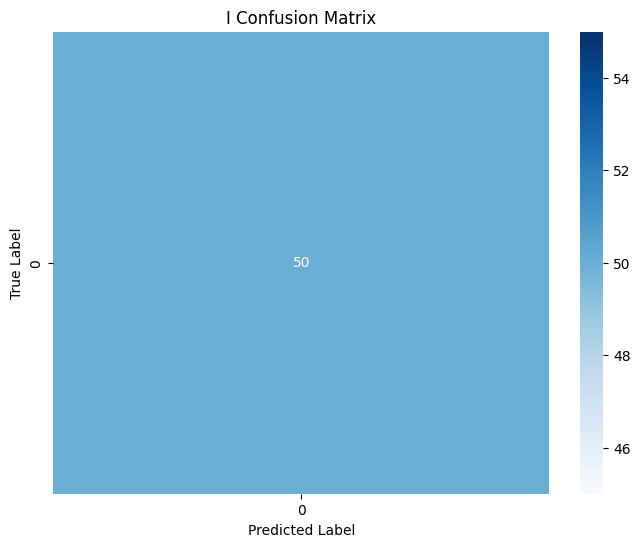

G Metrics:
Accuracy: 100.0%
F1 Score: 1.0


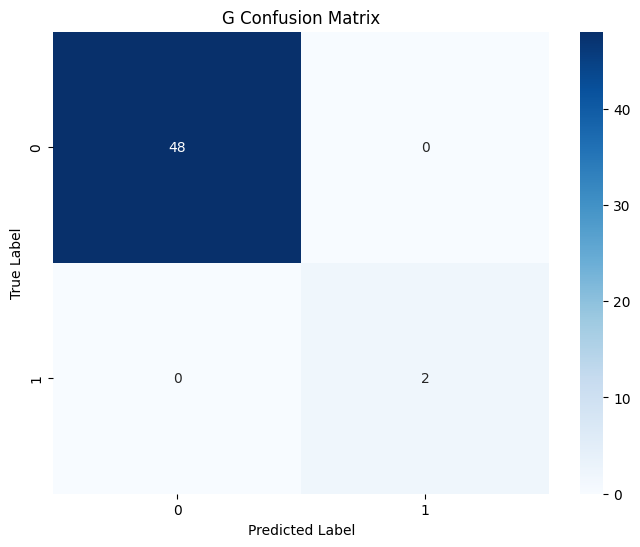

HRP Metrics:
Accuracy: 92.0%
F1 Score: 0.895


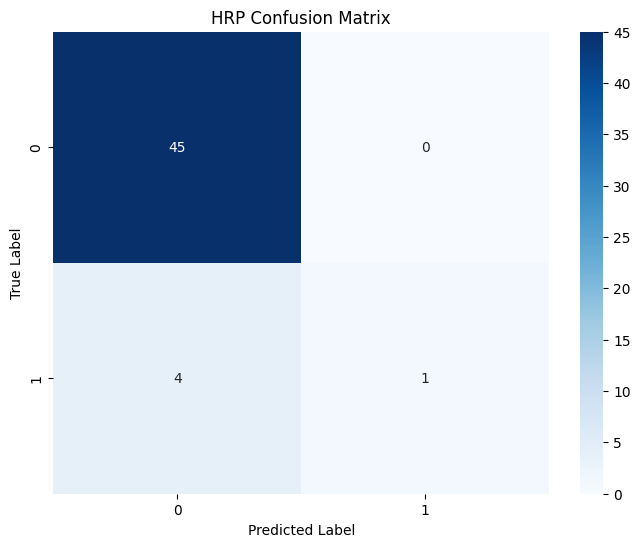

In [ ]:
# 성능 평가 및 플롯 실행
performance_metrics = evaluate_performance(labels, pred)
for key, value in performance_metrics.items():
    print(f"{key} Metrics:")
    print(f"Accuracy: {round(value['Accuracy']*100,2)}%")
    print(f"F1 Score: {round(value['F1 Score'], 4)}")
    # print(f"Confusion Matrix:\n{value['Confusion Matrix']}\n")
    # 혼동 행렬 플롯
    if key in ['CAD-RADS', 'HRP', 'E', 'G', 'N', 'I', 'S']:
        class_labels = np.unique(np.concatenate((pred[key].dropna(), labels[key].dropna())))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix')
    elif key == 'Plaque Burden':
        # S가 0이고 CAC_available이 1인 경우만 선택
        mask = (labels['S'] == 0) & (labels['CAC_available'] == 1)
        plaque_data = pred[key][mask].dropna()
        plaque_labels = labels[key][mask].dropna()
        class_labels = np.unique(np.concatenate((plaque_data, plaque_labels)))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix (S=0, CAC_available=1)')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


CAD-RADS Metrics:
Accuracy: 55.1%
F1 Score: 0.5472


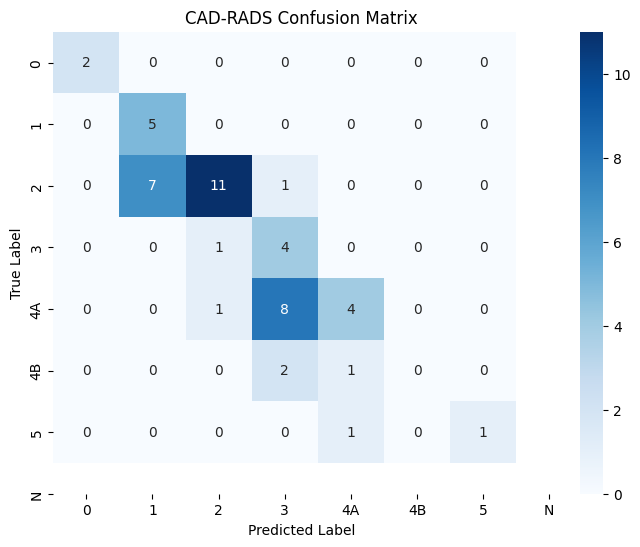

Plaque Burden Metrics:
Accuracy: 90.7%
F1 Score: 0.9063


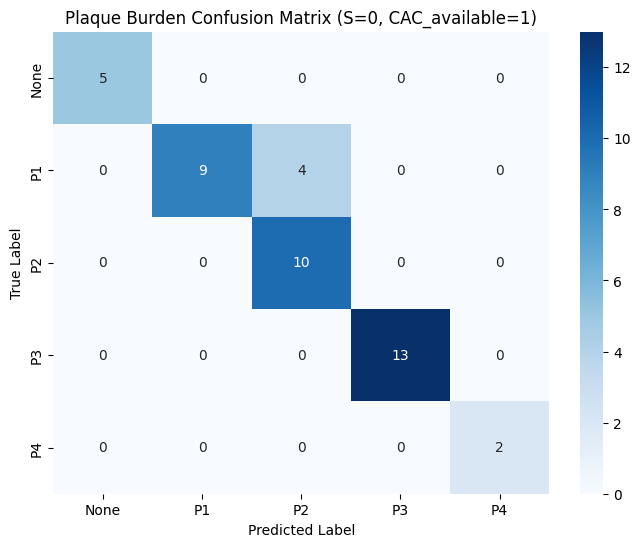

E Metrics:
Accuracy: 98.0%
F1 Score: 0.9701


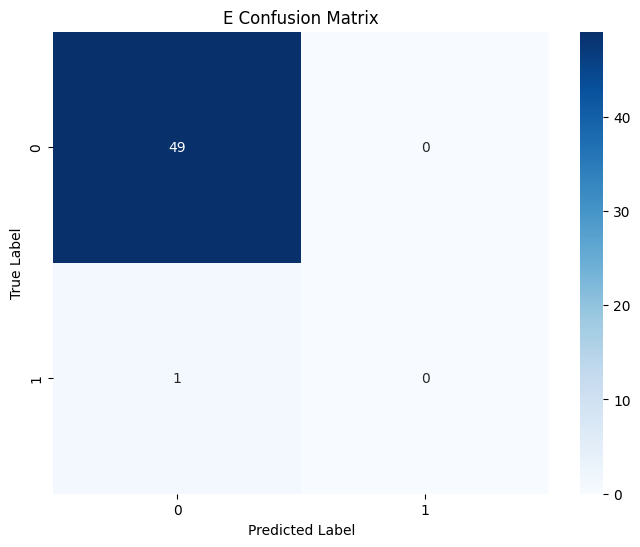

N Metrics:
Accuracy: 100.0%
F1 Score: 1.0


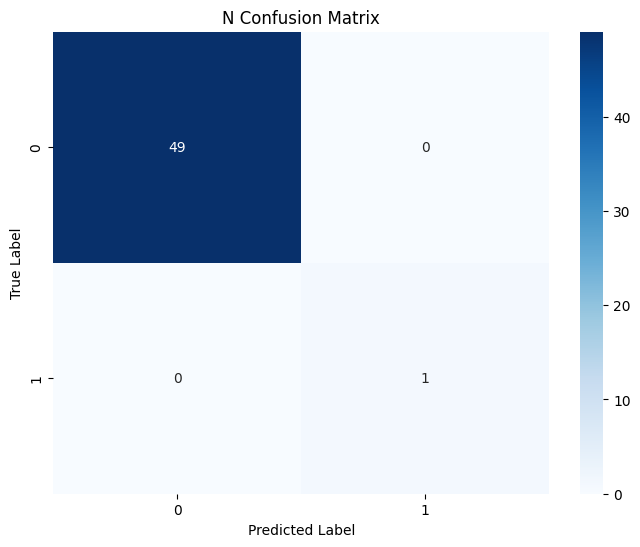

S Metrics:
Accuracy: 100.0%
F1 Score: 1.0


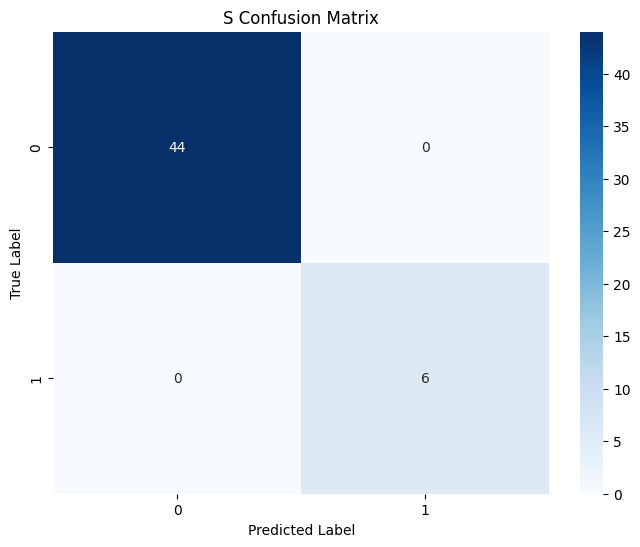

I Metrics:
Accuracy: 100.0%
F1 Score: 1.0


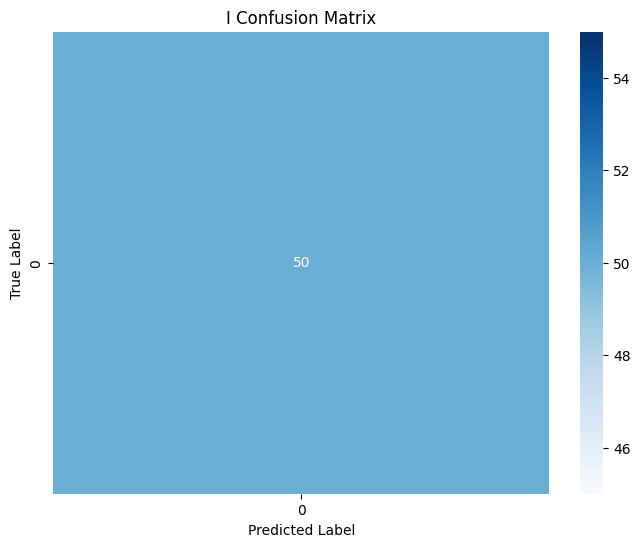

G Metrics:
Accuracy: 100.0%
F1 Score: 1.0


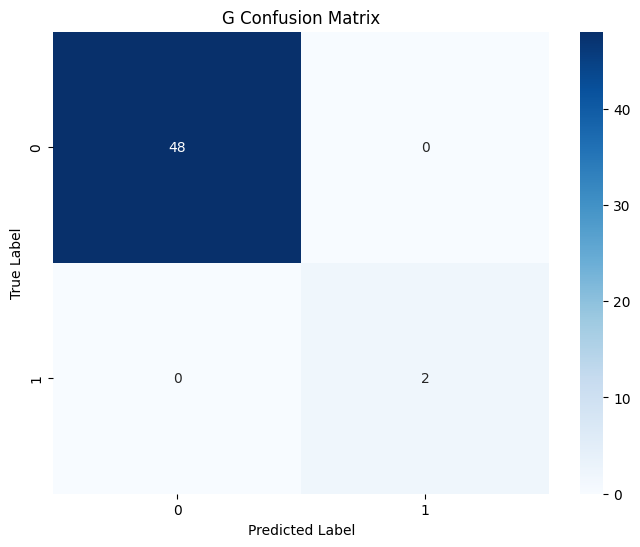

HRP Metrics:
Accuracy: 90.0%
F1 Score: 0.8526


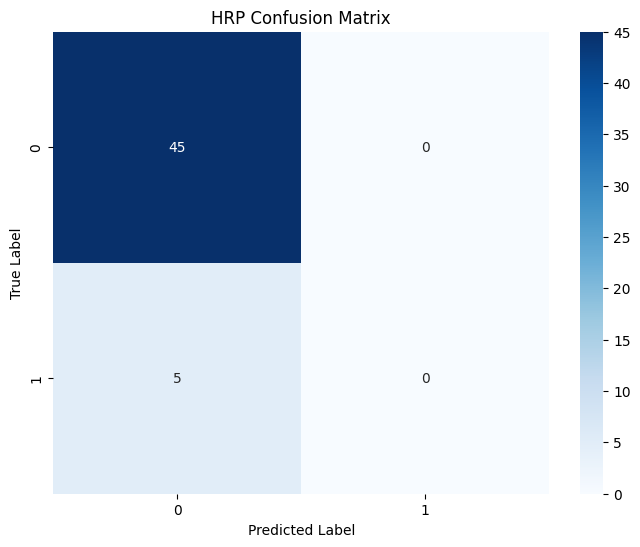

In [ ]:
# 성능 평가 및 플롯 실행
performance_metrics = evaluate_performance(labels, pred)
for key, value in performance_metrics.items():
    print(f"{key} Metrics:")
    print(f"Accuracy: {round(value['Accuracy']*100,2)}%")
    print(f"F1 Score: {round(value['F1 Score'], 4)}")
    # print(f"Confusion Matrix:\n{value['Confusion Matrix']}\n")
    # 혼동 행렬 플롯
    if key in ['CAD-RADS', 'HRP', 'E', 'G', 'N', 'I', 'S']:
        class_labels = np.unique(np.concatenate((pred[key].dropna(), labels[key].dropna())))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix')
    elif key == 'Plaque Burden':
        # S가 0이고 CAC_available이 1인 경우만 선택
        mask = (labels['S'] == 0) & (labels['CAC_available'] == 1)
        plaque_data = pred[key][mask].dropna()
        plaque_labels = labels[key][mask].dropna()
        class_labels = np.unique(np.concatenate((plaque_data, plaque_labels)))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix (S=0, CAC_available=1)')

In [23]:
certainty_comparison = compare_certainty(labels, pred, certainty)

NameError: name 'certainty' is not defined

In [43]:
# 결과 출력
for category, values in certainty_comparison.items():
    print(f"\n{category}:")
    print(f"  Correct predictions:")
    print(f"    Average: {values['Avg Certainty (Correct)']:.4f}")
    print(f"    Std Dev: {values['Std Certainty (Correct)']:.4f}")
    print(f"  Incorrect predictions:")
    print(f"    Average: {values['Avg Certainty (Incorrect)']:.4f}")
    print(f"    Std Dev: {values['Std Certainty (Incorrect)']:.4f}")
    print(f"  Difference in averages: {values['Difference']:.4f}")
    print(f"  T-statistic: {values['t-statistic']:.4f}")
    print(f"  P-value: {values['p-value']:.4f}")
    print(f"  Statistical Significance: {'Significant' if values['p-value'] < 0.05 else 'Not Significant'}")


CAD-RADS:
  Correct predictions:
    Average: 9.8108
    Std Dev: 0.4277
  Incorrect predictions:
    Average: 9.5000
    Std Dev: 0.5270
  Difference in averages: 0.3108
  T-statistic: 2.0982
  P-value: 0.0390
  Statistical Significance: Significant

Plaque Burden:
  Correct predictions:
    Average: 10.0000
    Std Dev: 0.0000
  Incorrect predictions:
    Average: 10.0000
    Std Dev: 0.0000
  Difference in averages: 0.0000
  T-statistic: nan
  P-value: nan
  Statistical Significance: Not Significant


# Claude3.5 sonnet

In [30]:
labels = data.iloc[:,4:]

# pred = pd.read_excel('result_0814_claude_v4.2.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.3_.xlsx')
# pred = pd.read_excel('result_0828_claude_v4.3_CoT.xlsx')
# pred = pred.iloc[:,-8:]

# pred = pd.read_excel('result_0829_claude_v4.3_CoT.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.4_CoT.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.4_CoT_x_after_answer.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.4_CoT_x_after_answer_x_none.xlsx')
# pred = pd.read_excel('result_0913_claude_v4.4_CoT_x_after_answer_x_none.xlsx')
# pred = pd.read_excel('result_0930_claude_v4.5_CoT.xlsx')
# pred = pd.read_excel('result_0930_claude_v4.5_CoT_edit.xlsx')
# pred = pred.iloc[:,-9:-1]

# pred = pd.read_excel('result_0930_claude_v4.5_CoT_edit_certainty.xlsx')
pred = pd.read_excel('result_1014_claude_InterVal_v4.5_CoT_edit_certainty_UpperEnd.xlsx')
certainty = pred[['certainty_cadrads', 'certainty_plaque']]
pred = pred.iloc[:,-11:-3]

# 모든 컬럼 이름에서 '.1' 제거
pred.columns = pred.columns.str.replace('.1', '')
pred = pred[labels.iloc[:,:-1].columns]

C:\Users\User\AppData\Local\Temp\ipykernel_171632\3577993295.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  pred.columns = pred.columns.str.replace('.1', '')


CAD-RADS Metrics:
Accuracy: 95.88%
F1 Score: 0.9581


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


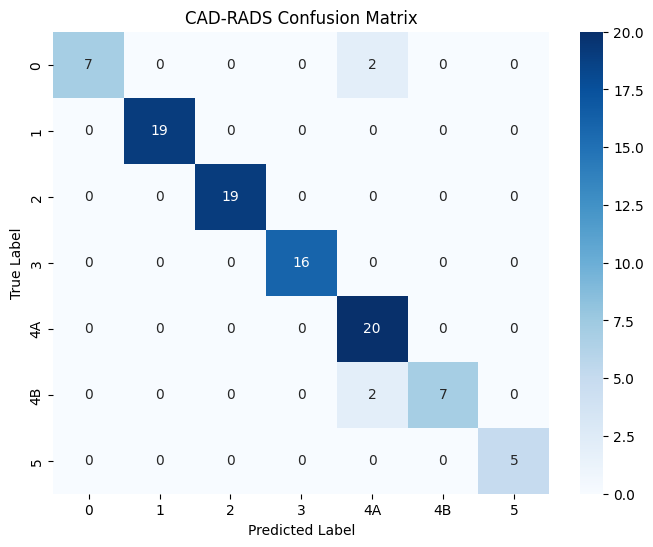

Plaque Burden Metrics:
Accuracy: 100.0%
F1 Score: 1.0


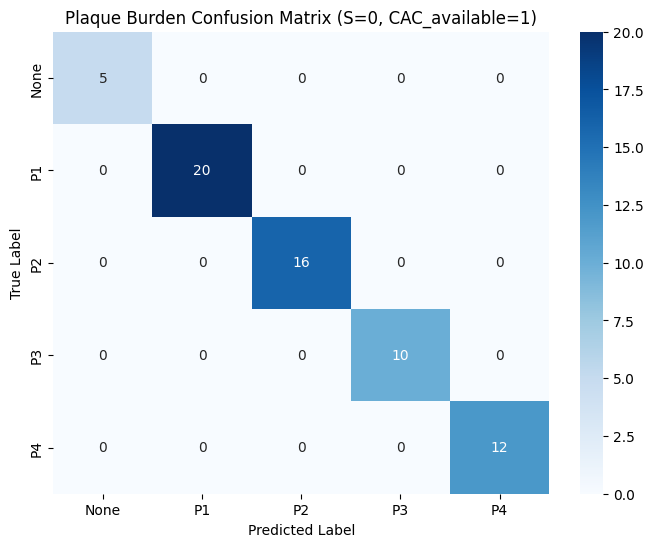

S Metrics:
Accuracy: 100.0%
F1 Score: 1.0


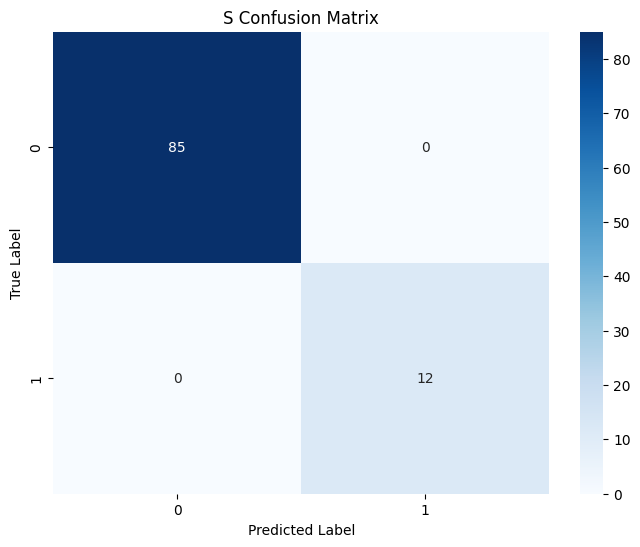

HRP Metrics:
Accuracy: 97.94%
F1 Score: 0.9896


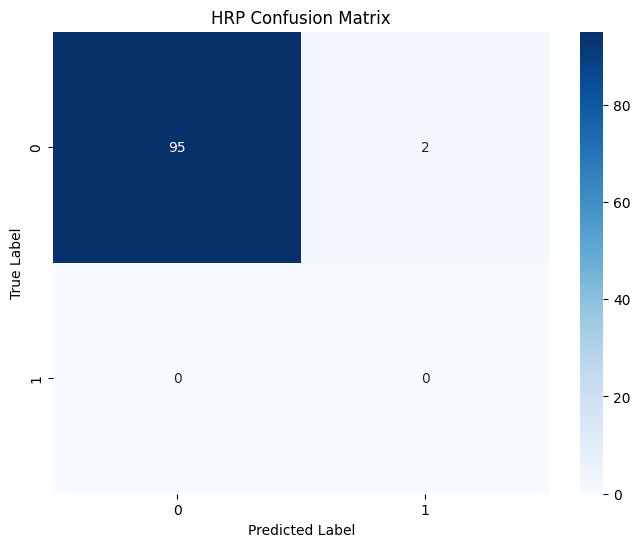

G Metrics:
Accuracy: 100.0%
F1 Score: 1.0


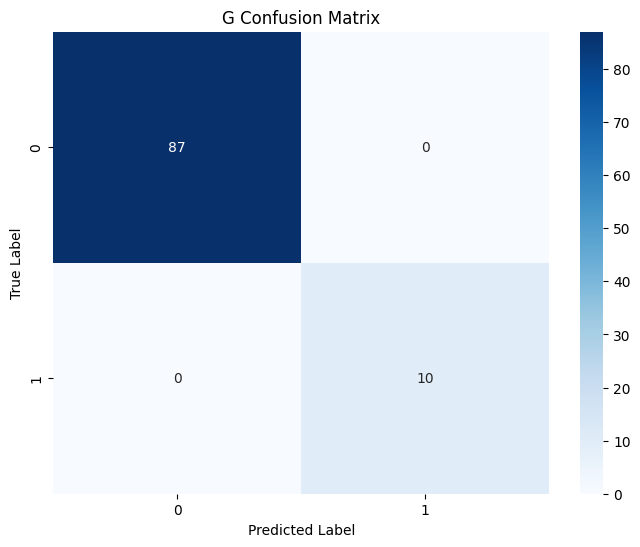

N Metrics:
Accuracy: 94.85%
F1 Score: 0.9518


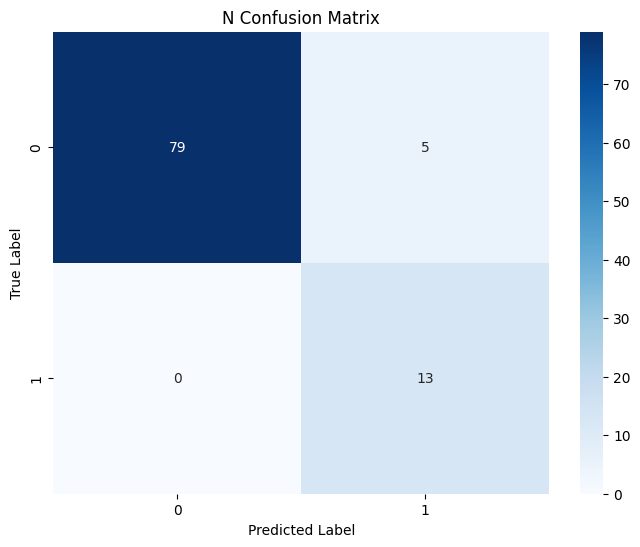

I Metrics:
Accuracy: 100.0%
F1 Score: 1.0


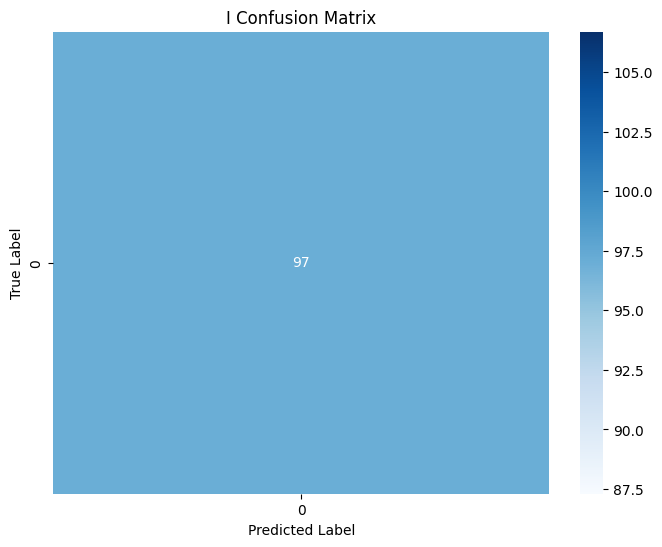

E Metrics:
Accuracy: 98.97%
F1 Score: 0.9914


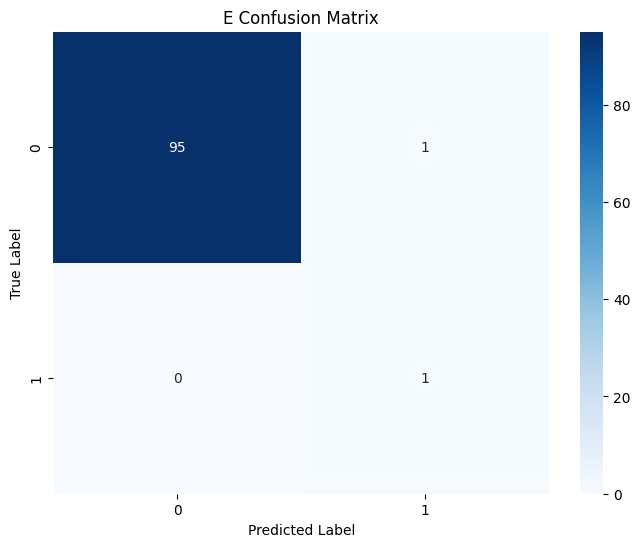

In [31]:
# 성능 평가 및 플롯 실행
performance_metrics = evaluate_performance(labels.iloc[3:], pred.iloc[3:])
for key, value in performance_metrics.items():
    print(f"{key} Metrics:")
    print(f"Accuracy: {round(value['Accuracy']*100,2)}%")
    print(f"F1 Score: {round(value['F1 Score'], 4)}")
    # print(f"Confusion Matrix:\n{value['Confusion Matrix']}\n")
    # 혼동 행렬 플롯
    if key in ['CAD-RADS', 'HRP', 'E', 'G', 'N', 'I', 'S']:
        class_labels = np.unique(np.concatenate((pred[key].dropna(), labels[key].dropna())))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix')
    elif key == 'Plaque Burden':
        # S가 0이고 CAC_available이 1인 경우만 선택
        mask = (labels['S'].iloc[3:] == 0) & (labels['CAC_available'].iloc[3:] == 1)
        plaque_data = pred[key].iloc[3:][mask].dropna()
        plaque_labels = labels[key].iloc[3:][mask].dropna()
        class_labels = np.unique(np.concatenate((plaque_data, plaque_labels)))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix (S=0, CAC_available=1)')

In [60]:
certainty_comparison = compare_certainty(labels, pred, certainty)

In [61]:
# 결과 출력
for category, values in certainty_comparison.items():
    print(f"\n{category}:")
    print(f"  Correct predictions:")
    print(f"    Average: {values['Avg Certainty (Correct)']:.4f}")
    print(f"    Std Dev: {values['Std Certainty (Correct)']:.4f}")
    print(f"  Incorrect predictions:")
    print(f"    Average: {values['Avg Certainty (Incorrect)']:.4f}")
    print(f"    Std Dev: {values['Std Certainty (Incorrect)']:.4f}")
    print(f"  Difference in averages: {values['Difference']:.4f}")
    print(f"  T-statistic: {values['t-statistic']:.4f}")
    print(f"  P-value: {values['p-value']:.4f}")
    print(f"  Statistical Significance: {'Significant' if values['p-value'] < 0.05 else 'Not Significant'}")


CAD-RADS:
  Correct predictions:
    Average: 8.9140
    Std Dev: 0.6537
  Incorrect predictions:
    Average: 8.2500
    Std Dev: 0.9574
  Difference in averages: 0.6640
  T-statistic: 1.9541
  P-value: 0.0536
  Statistical Significance: Not Significant

Plaque Burden:
  Correct predictions:
    Average: 9.9683
    Std Dev: 0.2520
  Incorrect predictions:
    Average: 8.2941
    Std Dev: 1.7326
  Difference in averages: 1.6741
  T-statistic: 7.5556
  P-value: 0.0000
  Statistical Significance: Significant


# Gemini

In [32]:
labels = data.iloc[:,4:]

# pred = pd.read_excel('result_0814_claude_v4.2.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.3_.xlsx')
# pred = pd.read_excel('result_0828_claude_v4.3_CoT.xlsx')
# pred = pred.iloc[:,-8:]

# pred = pd.read_excel('result_0829_claude_v4.3_CoT.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.4_CoT.xlsx')
# pred = pd.read_excel('result_0829_claude_v4.4_CoT_x_after_answer.xlsx')
# pred = pd.read_excel('result_0829_gemini_v4.4_CoT_x_after_answer_x_none.xlsx')
# pred = pd.read_excel('result_0913_gemini_v4.4_CoT_x_after_answer_x_none.xlsx')
# pred = pd.read_excel('result_0930_gemini_v4.5_CoT_edit.xlsx')
# pred = pred.iloc[:,-9:-1]

# pred = pd.read_excel('result_0930_gemini_v4.5_CoT_edit_certainty.xlsx')
pred = pd.read_excel('result_1014_gemini_InterVal_v4.5_CoT_edit_certainty_UpperEnd.xlsx')
certainty = pred[['certainty_cadrads', 'certainty_plaque']]
pred = pred.iloc[:,-11:-3]

# 모든 컬럼 이름에서 '.1' 제거
pred.columns = pred.columns.str.replace('.1', '')
pred = pred[labels.iloc[:,:-1].columns]
pred.loc[pred['CAD-RADS']=='4', 'CAD-RADS']='4A'

C:\Users\User\AppData\Local\Temp\ipykernel_171632\1706678154.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  pred.columns = pred.columns.str.replace('.1', '')


CAD-RADS Metrics:
Accuracy: 86.6%
F1 Score: 0.8597


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


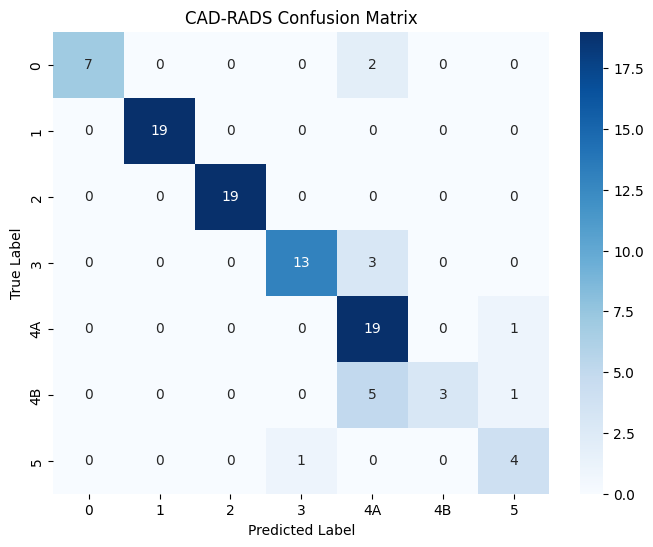

Plaque Burden Metrics:
Accuracy: 95.24%
F1 Score: 0.9524


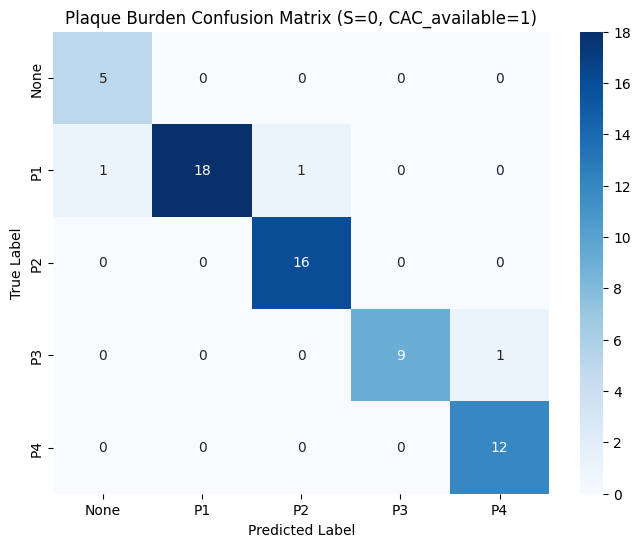

S Metrics:
Accuracy: 98.97%
F1 Score: 0.9895


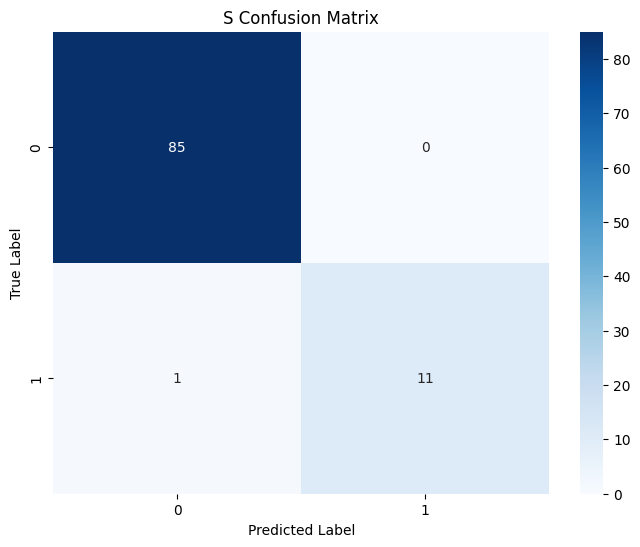

HRP Metrics:
Accuracy: 97.94%
F1 Score: 0.9896


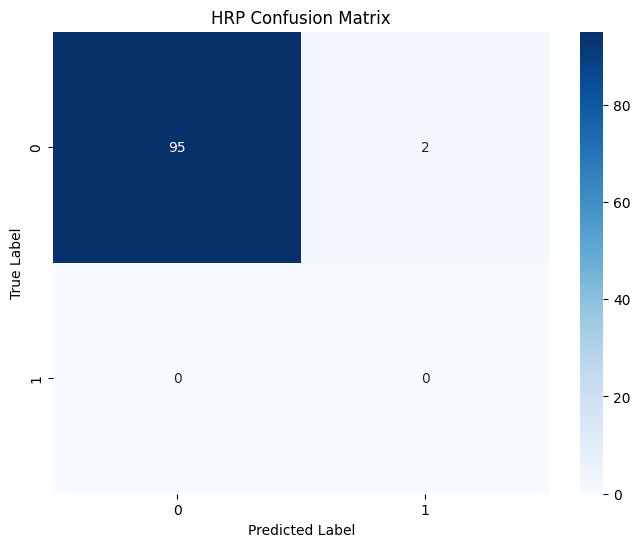

G Metrics:
Accuracy: 100.0%
F1 Score: 1.0


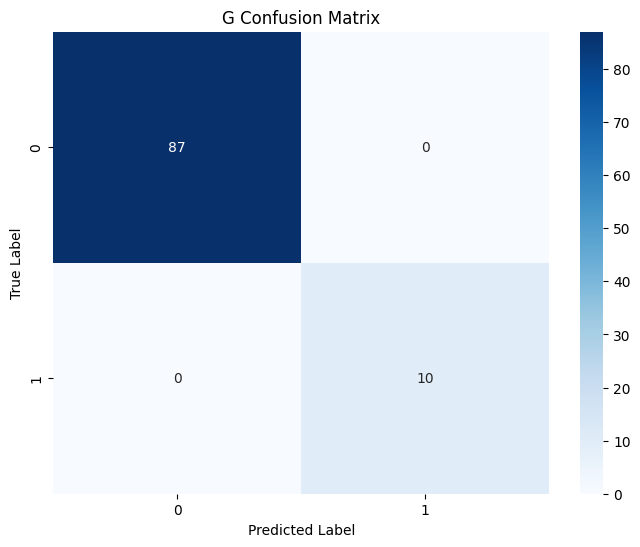

N Metrics:
Accuracy: 94.85%
F1 Score: 0.9493


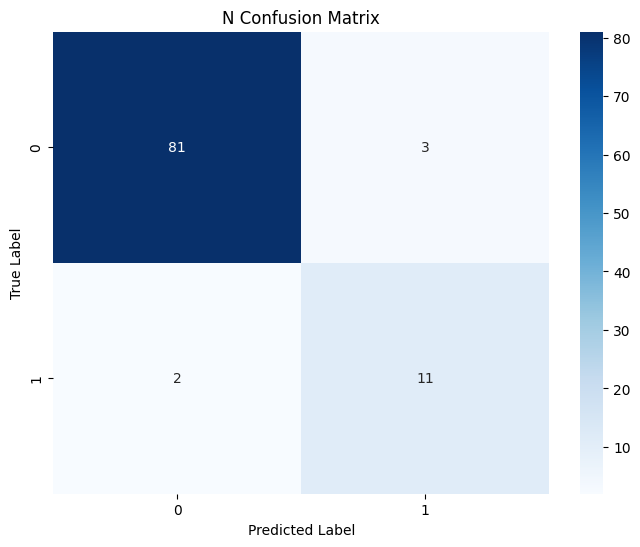

I Metrics:
Accuracy: 100.0%
F1 Score: 1.0


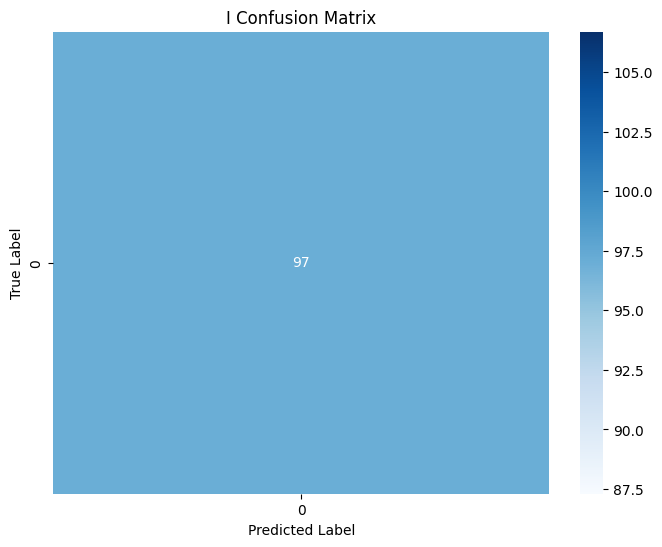

E Metrics:
Accuracy: 97.94%
F1 Score: 0.9844


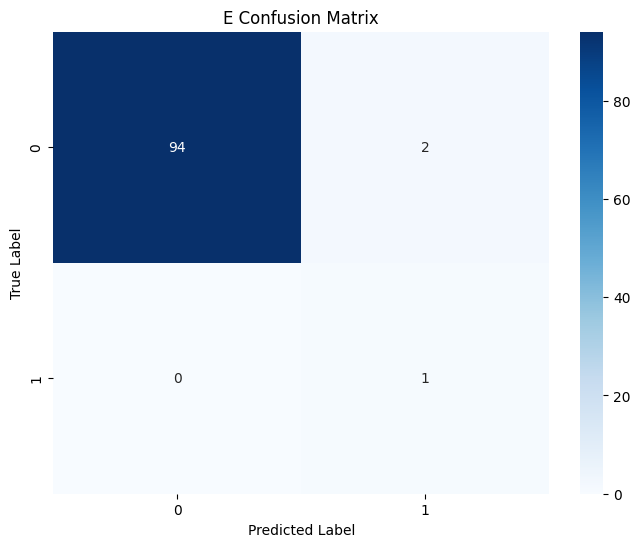

In [33]:
# 성능 평가 및 플롯 실행
performance_metrics = evaluate_performance(labels.iloc[3:], pred.iloc[3:])
for key, value in performance_metrics.items():
    print(f"{key} Metrics:")
    print(f"Accuracy: {round(value['Accuracy']*100,2)}%")
    print(f"F1 Score: {round(value['F1 Score'], 4)}")
    # print(f"Confusion Matrix:\n{value['Confusion Matrix']}\n")
    # 혼동 행렬 플롯
    if key in ['CAD-RADS', 'HRP', 'E', 'G', 'N', 'I', 'S']:
        class_labels = np.unique(np.concatenate((pred[key].dropna(), labels[key].dropna())))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix')
    elif key == 'Plaque Burden':
        # S가 0이고 CAC_available이 1인 경우만 선택
        mask = (labels['S'].iloc[3:] == 0) & (labels['CAC_available'].iloc[3:] == 1)
        plaque_data = pred[key].iloc[3:][mask].dropna()
        plaque_labels = labels[key].iloc[3:][mask].dropna()
        class_labels = np.unique(np.concatenate((plaque_data, plaque_labels)))
        plot_confusion_matrix(value['Confusion Matrix'], class_labels, title=f'{key} Confusion Matrix (S=0, CAC_available=1)')

In [51]:
certainty_comparison = compare_certainty(labels, pred, certainty)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [52]:
# 결과 출력
for category, values in certainty_comparison.items():
    print(f"\n{category}:")
    print(f"  Correct predictions:")
    print(f"    Average: {values['Avg Certainty (Correct)']:.4f}")
    print(f"    Std Dev: {values['Std Certainty (Correct)']:.4f}")
    print(f"  Incorrect predictions:")
    print(f"    Average: {values['Avg Certainty (Incorrect)']:.4f}")
    print(f"    Std Dev: {values['Std Certainty (Incorrect)']:.4f}")
    print(f"  Difference in averages: {values['Difference']:.4f}")
    print(f"  T-statistic: {values['t-statistic']:.4f}")
    print(f"  P-value: {values['p-value']:.4f}")
    print(f"  Statistical Significance: {'Significant' if values['p-value'] < 0.05 else 'Not Significant'}")


CAD-RADS:
  Correct predictions:
    Average: 9.0119
    Std Dev: 0.7838
  Incorrect predictions:
    Average: 8.8462
    Std Dev: 0.8006
  Difference in averages: 0.1658
  T-statistic: 0.7076
  P-value: 0.4809
  Statistical Significance: Not Significant

Plaque Burden:
  Correct predictions:
    Average: 10.0000
    Std Dev: 0.0000
  Incorrect predictions:
    Average: 8.4054
    Std Dev: 1.7553
  Difference in averages: 1.5946
  T-statistic: 7.0599
  P-value: 0.0000
  Statistical Significance: Significant
